<a href="https://colab.research.google.com/github/arseller/VirtualMaitre/blob/master/Clients_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clients Clustering



---






<p>&nbsp;</p> 

##### **Data Flow**

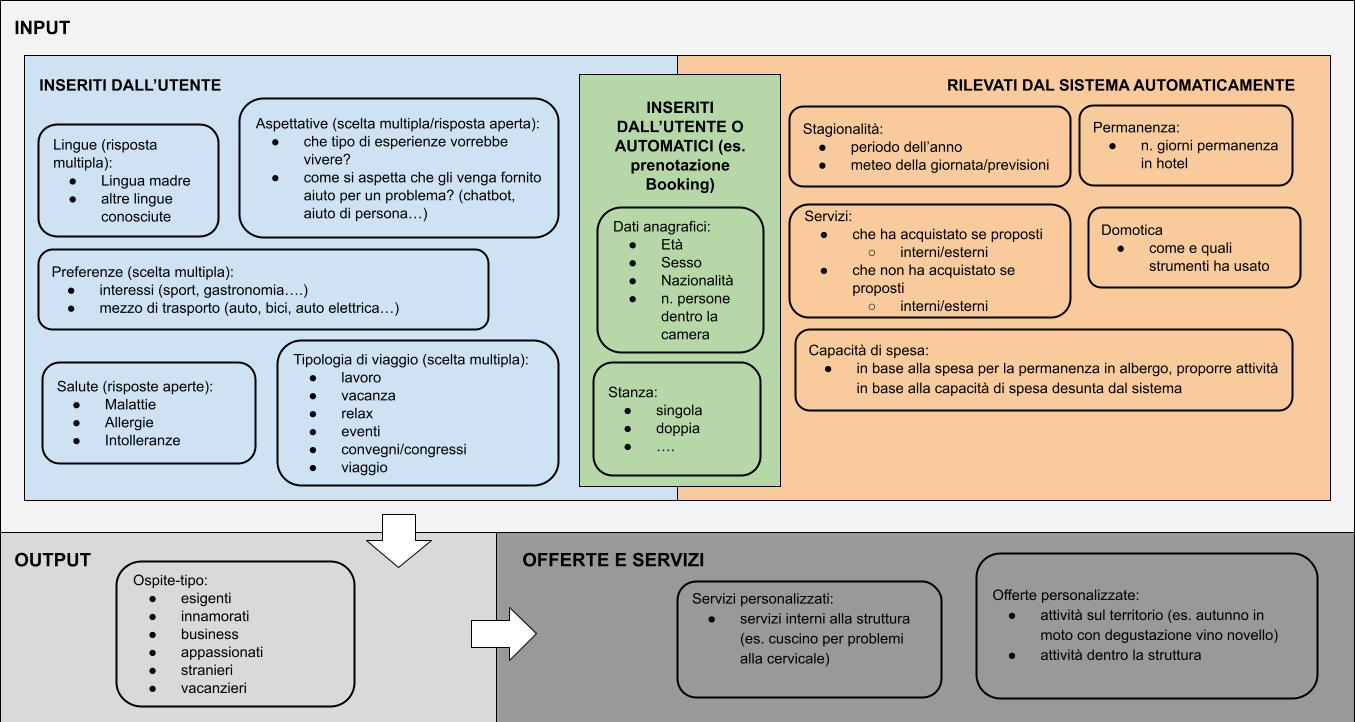



---



<p>&nbsp;</p> 

##### **Clustering Target**


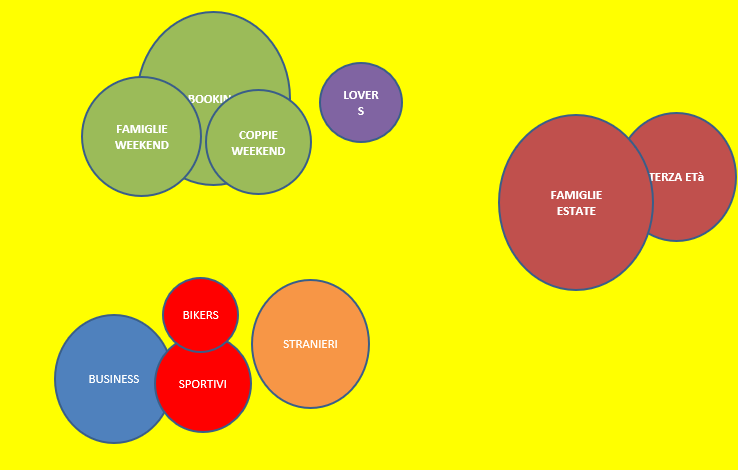




---



<p>&nbsp;</p> 

##### **Import modules and dataset**



In [1]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
#@title

from google.colab import drive
drive.mount('/content/drive/')

columns = [
    'hotel', # 0: resort hotel or city hotel
    'is_canceled', # 1: booking was cancelled (1) or not cancelled (0)
    'lead_time', # 2: days elapsed between the entering date of the booking into the PMS and the arrival date
    'arrival_date_year', # 3: year of arrival date
    'arrival_date_month', # 4: month of arrival date
    'arrival_date_week_number', # 5: week of arrival date
    'arrival_date_day', # 6: day of arrival date
    'stays_in_weekend_nights', # 7: number of weekend night (saturday or sunday)
    'stays_in_week_nights', # 8: number of week nights
    'adults', # 9: number of adults
    'children', # 10: number of children
    'babies', # 11: number of babies
    'meal', # 12: type of meal -> BB(Bed&Breakfast), HB(Half Board - mezza pensione), SC(Self Catering), Undefined, FB(Full Board)
    'country', # 13: country of origin
    'market_segment', # 14: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
    'distribution_channel', # 15: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators
    'is_repeated_guest', # 16: repeated guest (1) or not (0)
    'previous_cancellations',# 17: Number of previous bookings that were cancelled by the customer prior to the current booking
    'previous_bookings_not_canceled', # 18: Number of previous bookings not cancelled by the customer prior to the current booking
    'reserved_room_type', # 19: Code of room type reserved. Code is presented instead of designation for anonymity reasons
    'assigned_room_type', # 20: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due
    'booking_changes', # 21: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS
    'deposit_type', # 22: No Deposit; Non Refund; Refundable
    'agent', # 23: ID of the travel agency that made the booking
    'company', # 24: ID of the company/entity that made the booking or responsible for paying the booking
    'days_in_waiting_list', # 25: Number of days the booking was in the waiting list before it was confirmed to the customer
    'customer_type', # 26: Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
    'adr', # 27: Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)
    'required_car_parking_spaces', # 28: Number of car parking spaces required by the customer
    'total_of_special_requests', # 29: Number of special requests made by the customer (e.g. twin bed or high floor)
    'reservation_status', # 30: Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
    'reservation_status_date', # 31: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel
    'name', # 32
    'email', # 33
    'phone-number', # 34
    'credit_card' # 35 
]

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/VirtualMaitre/HotelDataset.csv')
print('\n\n\nDataset: {:} rows, {:} columns'.format(df.shape[0], df.shape[1]))
print('\nColumns:\n', list(df.columns.values), '\n\n')
df.head(5)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).



Dataset: 119390 rows, 36 columns

Columns:
 ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card'] 




,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498




---




<p>&nbsp;</p> 

##### **Drop Features**

In [3]:
#@title 

data = df.copy()
data.drop('hotel', axis=1, inplace=True)
data.drop('is_canceled', axis=1, inplace=True)
data.drop('lead_time', axis=1, inplace=True)
data.drop('arrival_date_year', axis=1, inplace=True)
data.drop('arrival_date_week_number', axis=1, inplace=True)
# data.drop('arrival_date_day', axis=1, inplace=True)
data.drop('market_segment', axis=1, inplace=True)
data.drop('distribution_channel', axis=1, inplace=True)
data.drop('is_repeated_guest', axis=1, inplace=True)
data.drop('previous_cancellations', axis=1, inplace=True)
data.drop('previous_bookings_not_canceled', axis=1, inplace=True)
data.drop('reserved_room_type', axis=1, inplace=True)
data.drop('assigned_room_type', axis=1, inplace=True)
data.drop('booking_changes', axis=1, inplace=True)
data.drop('deposit_type', axis=1, inplace=True)
data.drop('agent', axis=1, inplace=True)
data.drop('company', axis=1, inplace=True)
data.drop('days_in_waiting_list', axis=1, inplace=True)
data.drop('customer_type', axis=1, inplace=True)
# data.drop('adr', axis=1, inplace=True)
data.drop('reservation_status', axis=1, inplace=True)
data.drop('reservation_status_date', axis=1, inplace=True)
data.drop('name', axis=1, inplace=True)
data.drop('email', axis=1, inplace=True)
data.drop('phone-number', axis=1, inplace=True)
data.drop('credit_card', axis=1, inplace=True)

cols = list(data.columns.values)
print('Remaining Features:\n', data.columns.values)

Remaining Features:
 ['arrival_date_month' 'arrival_date_day_of_month'
 'stays_in_weekend_nights' 'stays_in_week_nights' 'adults' 'children'
 'babies' 'meal' 'country' 'adr' 'required_car_parking_spaces'
 'total_of_special_requests']




---




<p>&nbsp;</p> 

##### **Useful functions**

In [4]:
# @title

# Label bar plot

def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{}'.format(width), xy=(width, rect.get_y() + rect.get_height() - 0.07), 
                    xytext=(13, 0), textcoords="offset points", ha='center', va='bottom')

In [5]:
# @title

# lambda function

diff = lambda l1,l2: [x for x in l1 if x not in l2]





---



<p>&nbsp;</p> 

##### **1. EXPLORATION DATA ANALYSIS (EDA)** 

Useful Fetaures:


*   arrival_date_month
*   arrival_date_day
*   stays_in_weekend_nights
*   stays_in_week_nights
*   adults
*   children
*   babies
*   meal
*   country
*   adr
*   required_car_parking_spaces
*   total_of_special_requests


Steps:


1.   Drop Missing Values And No-Guest Occurrences
2.   Visual Analysis



<p>&nbsp;</p> 

> **Dataset Info**


In [6]:
data.head(5)

,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,adr,required_car_parking_spaces,total_of_special_requests
0,July,1,0,0,2,0.0,0,BB,PRT,0.0,0,0
1,July,1,0,0,2,0.0,0,BB,PRT,0.0,0,0
2,July,1,0,1,1,0.0,0,BB,GBR,75.0,0,0
3,July,1,0,1,1,0.0,0,BB,GBR,75.0,0,0
4,July,1,0,2,2,0.0,0,BB,GBR,98.0,0,1


In [7]:
# dtype, missing values presence
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   arrival_date_month           119390 non-null  object 
 1   arrival_date_day_of_month    119390 non-null  int64  
 2   stays_in_weekend_nights      119390 non-null  int64  
 3   stays_in_week_nights         119390 non-null  int64  
 4   adults                       119390 non-null  int64  
 5   children                     119386 non-null  float64
 6   babies                       119390 non-null  int64  
 7   meal                         119390 non-null  object 
 8   country                      118902 non-null  object 
 9   adr                          119390 non-null  float64
 10  required_car_parking_spaces  119390 non-null  int64  
 11  total_of_special_requests    119390 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 10.9+ MB


In [8]:
# how many missing values
data.isnull().sum(axis=0)

arrival_date_month               0
arrival_date_day_of_month        0
stays_in_weekend_nights          0
stays_in_week_nights             0
adults                           0
children                         4
babies                           0
meal                             0
country                        488
adr                              0
required_car_parking_spaces      0
total_of_special_requests        0
dtype: int64

In [9]:
# values distribution
data.describe(include='all')

,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,adr,required_car_parking_spaces,total_of_special_requests
count,119390,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390.000000,119390.000000,119390.000000
unique,12,NaN,NaN,NaN,NaN,NaN,NaN,5,177,NaN,NaN,NaN
top,August,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,NaN,NaN,NaN
freq,13877,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,NaN,NaN,NaN
mean,NaN,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,101.831122,0.062518,0.571363
std,NaN,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,50.535790,0.245291,0.792798
min,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-6.380000,0.000000,0.000000
25%,NaN,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,69.290000,0.000000,0.000000
50%,NaN,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,94.575000,0.000000,0.000000
75%,NaN,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,126.000000,0.000000,1.000000


<p>&nbsp;</p> 

###### **1.1 Data Cleaning** 

###### Drop Missing Values And No-Guest Occurrences

In [10]:
# @title

print('\nMISSING VALUES')
print('\nshape before dropping: ', data.shape)
datad=data.dropna(axis=0, subset=cols)
print('shape after dropping: ', datad.shape)
dropped=data.shape[0]-datad.shape[0]
print('dropped {:.2f} samples = {:.2f}% of dataset'.format(dropped, dropped*100/data.shape[0]))
data=datad.copy()


MISSING VALUES

shape before dropping:  (119390, 12)
shape after dropping:  (118898, 12)
dropped 492.00 samples = 0.41% of dataset


In [11]:
# @title

print('\nNO GUEST')

print('\nshape before dropping: ', data.shape)
zero_guests = list(data.loc[data["adults"]
                            + data["children"]
                            + data["babies"]==0].index)
s = data.shape
data.drop(data.index[zero_guests], inplace=True)
print('shape after dropping: ', data.shape)
dropped=s[0]-data.shape[0]
print('dropped {:.2f} samples = {:.2f}% of dataset'.format(dropped, dropped*100/data.shape[0]))



NO GUEST

shape before dropping:  (118898, 12)
shape after dropping:  (118728, 12)
dropped 170.00 samples = 0.14% of dataset


<p>&nbsp;</p> 

###### **1.2 Visual Analysis** 


<p>&nbsp;</p> 

> **Heat Map**  


In [12]:
corr = data.corr()
corr.style.background_gradient()

,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,adr,required_car_parking_spaces,total_of_special_requests
arrival_date_day_of_month,1.000000,-0.015891,-0.027656,-0.001810,0.014541,-0.000829,0.029871,0.008277,0.003221
stays_in_weekend_nights,-0.015891,1.000000,0.495223,0.090451,0.045439,0.018493,0.047399,-0.018102,0.071836
stays_in_week_nights,-0.027656,0.495223,1.000000,0.091802,0.044130,0.020277,0.063537,-0.024400,0.066770
adults,-0.001810,0.090451,0.091802,1.000000,0.029532,0.017844,0.227308,0.016270,0.121622
children,0.014541,0.045439,0.044130,0.029532,1.000000,0.024004,0.325211,0.057142,0.081762
babies,-0.000829,0.018493,0.020277,0.017844,0.024004,1.000000,0.028628,0.037103,0.097762
adr,0.029871,0.047399,0.063537,0.227308,0.325211,0.028628,1.000000,0.058035,0.171392
required_car_parking_spaces,0.008277,-0.018102,-0.024400,0.016270,0.057142,0.037103,0.058035,1.000000,0.082624
total_of_special_requests,0.003221,0.071836,0.066770,0.121622,0.081762,0.097762,0.171392,0.082624,1.000000


<p>&nbsp;</p> 

> **Country** 

In [13]:
# @title

# get number of acutal guests by country
country_data = pd.DataFrame(data["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [14]:
# @title
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()



---






<p>&nbsp;</p> 

##### **2. PREPROCESSING**  

Steps: 

1.   Price-Per-Night
2.   Categorical Columns
3.   Numerical Columns
4.   Normalization




<p>&nbsp;</p> 

###### **2.1 Price-Per-Night** 

Adding new features obtained from 'adr'  
Drop 'price_per_night' <= 0  and 'price_per_night' > 1000  
Drop duplicates  
Drop 'adr'

In [15]:
# @title

# Counting adults and children as paying guests only, not babies.
data['price_per_night'] = data['adr'] / (data['adults'] + data['children'])

data = pd.concat([data.loc[(data['price_per_night'] <= 0.0) | (data['price_per_night'] > 1000)],data]).drop_duplicates(keep=False)

data.drop('adr', axis=1, inplace=True)

print('\n\nAverage price: {:.2f}€ per night and person.'.format(data['price_per_night'].mean()))

print('\n\nData Shape: ',data.shape,'\n')

data.head(5)



Average price: 57.36€ per night and person.


Data Shape:  (69878, 12) 



,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,required_car_parking_spaces,total_of_special_requests,price_per_night
6,July,1,0,2,2,0.0,0,BB,PRT,0,0,53.50
7,July,1,0,2,2,0.0,0,FB,PRT,0,1,51.50
8,July,1,0,3,2,0.0,0,BB,PRT,0,1,41.00
9,July,1,0,3,2,0.0,0,HB,PRT,0,0,52.75
10,July,1,0,4,2,0.0,0,BB,PRT,0,0,61.50


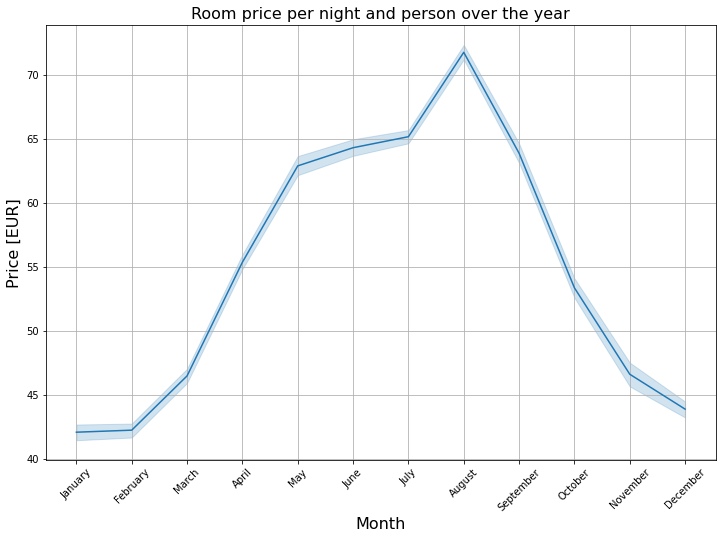

In [16]:
# @title

room_prices_mothly = data[['arrival_date_month', 'price_per_night']].sort_values('arrival_date_month')

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly['arrival_date_month'] = pd.Categorical(room_prices_mothly['arrival_date_month'], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = 'arrival_date_month', y='price_per_night', data=room_prices_mothly)
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.grid()
plt.show()

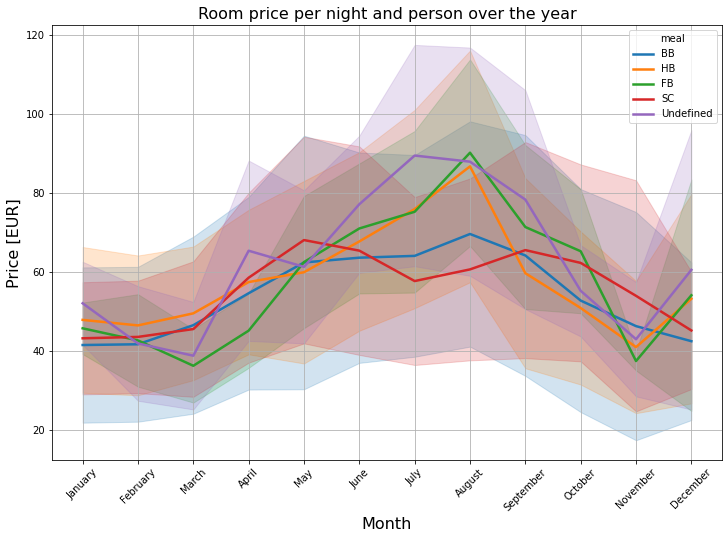

In [17]:
# @title

room_prices_mothly = data[['meal', 'arrival_date_month', 'price_per_night']].sort_values('arrival_date_month')

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly['arrival_date_month'] = pd.Categorical(room_prices_mothly['arrival_date_month'], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = 'arrival_date_month', y='price_per_night', hue="meal", data=room_prices_mothly, 
            hue_order = ['BB', 'HB', 'FB', 'SC', 'Undefined'], ci="sd", size="meal", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.grid()
plt.show()

<p>&nbsp;</p> 

###### *-1.2.1 Number of Guest* 

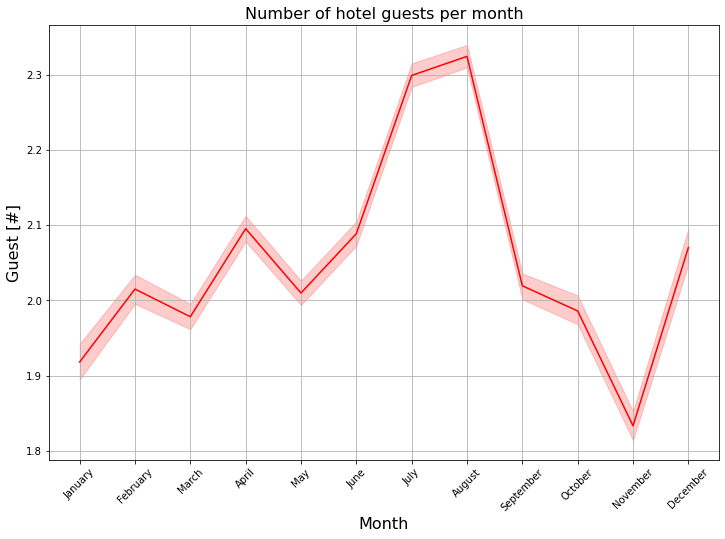

In [18]:
# @title

guest = data.copy()
guest.insert(1, 'guests',  guest['adults'] + guest['children'] + guest['babies'])

adults_mothly = guest[['arrival_date_month', 'guests']].sort_values('arrival_date_month')

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]

adults_mothly['arrival_date_month'] =  pd.Categorical(adults_mothly['arrival_date_month'], 
                                       categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = 'arrival_date_month', y='guests', data=adults_mothly, color='r')
plt.title("Number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Guest [#]", fontsize=16)
plt.grid()
plt.show()

<p>&nbsp;</p> 

###### *-1.2.2 Lenght of stay* 

In [19]:
# @title

guest["total_nights"] = guest["stays_in_weekend_nights"] + guest["stays_in_week_nights"]

num_nights_res = list(guest["total_nights"].value_counts().index)
num_bookings_res = list(guest["total_nights"].value_counts())
rel_bookings_res = guest["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

avg_nights_res = sum(list((res_nights["num_nights"] * (res_nights["rel_num_bookings"]/100)).values))
print(f"\n\nOn average, guests of the hotel stay {avg_nights_res:.2f} nights, and {res_nights['num_nights'].max()} at maximum.")



On average, guests of the hotel stay 3.81 nights, and 56 at maximum.


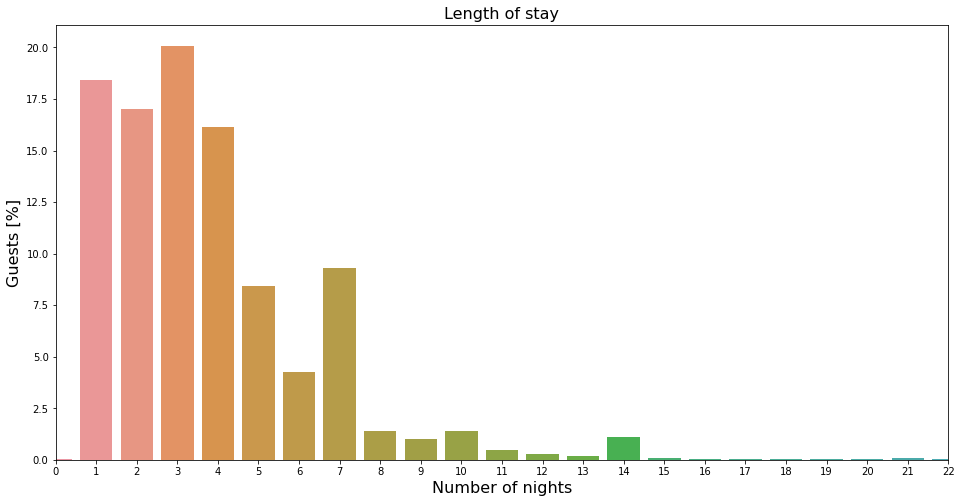

In [20]:
# @title

plt.figure(figsize=(16, 8))
sns.barplot(x = "num_nights", y = "rel_num_bookings", data=res_nights)
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.xlim(0,22)
# plt.grid()
plt.show()

<p>&nbsp;</p> 

###### **2.2 Categorical Columns** 


In [21]:
# @title

cat_cols = [col for col in data.columns if data[col].dtype == 'O']
print('\nCategorical columns:')
cat_cols


Categorical columns:


['arrival_date_month', 'meal', 'country']

In [22]:
# @title

num_cols = [col for col in data.columns if data[col].dtype != 'O']
print('\nNumerical columns:')
num_cols


Numerical columns:


['arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'price_per_night']

In [23]:
cols = data.columns
cat_df = data[cat_cols]
num_df = data[num_cols]

In [24]:
# @title

cat_df.head(5)

,arrival_date_month,meal,country
6,July,BB,PRT
7,July,FB,PRT
8,July,BB,PRT
9,July,HB,PRT
10,July,BB,PRT


In [25]:
# @title

num_df.head(5)

,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,required_car_parking_spaces,total_of_special_requests,price_per_night
6,1,0,2,2,0.0,0,0,0,53.50
7,1,0,2,2,0.0,0,0,1,51.50
8,1,0,3,2,0.0,0,0,1,41.00
9,1,0,3,2,0.0,0,0,0,52.75
10,1,0,4,2,0.0,0,0,0,61.50


In [26]:
# @title

print('\nUnique columns values:\n')
for col in cat_df.columns:
  print(f'{col}: \n{cat_df[col].unique()}\n')


Unique columns values:

arrival_date_month: 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

country: 
['PRT' 'USA' 'ESP' 'IRL' 'FRA' 'GBR' 'NOR' 'OMN' 'ARG' 'POL' 'DEU' 'BEL'
 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE' 'ROU'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'ZAF' 'ISR' 'CYM' 'ZMB'
 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV' 'HKG' 'IRN'
 'GEO' 'AND' 'TUR' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT' 'NGA'
 'MDV' 'VEN' 'SVK' 'AGO' 'FJI' 'KAZ' 'PHL' 'SEN' 'SYC' 'AZE' 'LBN' 'BHR'
 'NZL' 'IDN' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR' 'BIH'
 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU' 'VNM'
 'PLW' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL' 'BHS' 'PAK'
 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA

<p>&nbsp;</p> 

###### *-2.2.1 Country*


Only the countries that most frequently visit Italy remain labeled.  

Others go under the label 'altro_paese'

In [27]:
# @title

country_list = ['DEU', 'CHE', 'LIE', 'NLD', 'FRA', 'AUT', 'GBR', 'ESP', 'ITA', 'PRT']
cat_df.loc[(cat_df['country'] != 'DEU') & (cat_df['country'] != 'CHE') &
           (cat_df['country'] != 'LIE') & (cat_df['country'] != 'NLD') &
           (cat_df['country'] != 'FRA') & (cat_df['country'] != 'AUT') &
           (cat_df['country'] != 'GBR') & (cat_df['country'] != 'ESP') &
           (cat_df['country'] != 'PRT') & (cat_df['country'] != 'ITA'),
           'country'] = 'altro_paese'

print('\nMost relevant country:\n')
cat_df['country'].unique()


Most relevant country:



array(['PRT', 'altro_paese', 'ESP', 'FRA', 'GBR', 'DEU', 'CHE', 'ITA',
       'NLD', 'AUT', 'LIE'], dtype=object)

In [28]:
# @title 

country = pd.get_dummies(cat_df['country'])
cat_df = cat_df.drop('country',axis=1)
cat_df = pd.concat([cat_df, country], axis=1)

print('\nEncoding\ncat_df:\n')
cat_df.head()


Encoding
cat_df:



,arrival_date_month,meal,AUT,CHE,DEU,ESP,FRA,GBR,ITA,LIE,NLD,PRT,altro_paese
6,July,BB,0,0,0,0,0,0,0,0,0,1,0
7,July,FB,0,0,0,0,0,0,0,0,0,1,0
8,July,BB,0,0,0,0,0,0,0,0,0,1,0
9,July,HB,0,0,0,0,0,0,0,0,0,1,0
10,July,BB,0,0,0,0,0,0,0,0,0,1,0


<p>&nbsp;</p> 

###### *-2.2.2 Arrival Date Month*

In [29]:
# @title 

month = pd.get_dummies(cat_df['arrival_date_month'])
cat_df = cat_df.drop('arrival_date_month',axis=1)
cat_df = pd.concat([cat_df, month], axis=1)

print('\nEncoding\ncat_df:\n')
cat_df.head()


Encoding
cat_df:



,meal,AUT,CHE,DEU,ESP,FRA,GBR,ITA,LIE,NLD,PRT,altro_paese,April,August,December,February,January,July,June,March,May,November,October,September
6,BB,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
7,FB,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
8,BB,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
9,HB,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
10,BB,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


<p>&nbsp;</p> 

###### *-2.2.3 Meal* 

In [30]:
# @title 

cat_df = cat_df.rename({'Undefined': 'altro_pasto'}, axis=1)
meal = pd.get_dummies(cat_df['meal'])
cat_df = cat_df.drop('meal',axis=1)
cat_df = pd.concat([cat_df, meal], axis=1)

print('\nEncoding\ncat_df:\n')
cat_df.head()


Encoding
cat_df:



,AUT,CHE,DEU,ESP,FRA,GBR,ITA,LIE,NLD,PRT,altro_paese,April,August,December,February,January,July,June,March,May,November,October,September,BB,FB,HB,SC,Undefined
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


<p>&nbsp;</p> 

###### **2.3 Numerical Columns** 

In [31]:
num_cols

['arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'price_per_night']

<p>&nbsp;</p> 

###### *- 2.3.1 Arrival Date Of Month* 

Binning + Encoding


Days binning:



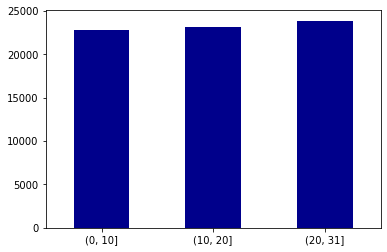

In [32]:
# @title

fig = plt.plot(figsize=(15,5))

bins = [0,10,20,31]

# WIND_S15
day_bins = pd.cut(num_df['arrival_date_day_of_month'], bins=bins, include_lowest=False)
day_bins.value_counts(sort=False).plot.bar(rot=0, color="darkblue")

print('\nDays binning:\n')

In [33]:
# @title

num_df['arrival_date_day_of_month'] = day_bins

day_bins = pd.get_dummies(num_df['arrival_date_day_of_month'])
num_df = num_df.drop('arrival_date_day_of_month',axis=1)
num_df = pd.concat([num_df, day_bins], axis=1)

num_df = num_df.rename({'(0, 10]': 'month_begin', '(10, 20]': 'month_begin', '(20, 31]': 'month_finish'}, axis=1)
print('\nEncoding\nnum_df:\n')
num_df.head()


Encoding
num_df:



,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,required_car_parking_spaces,total_of_special_requests,price_per_night,"(0, 10]","(10, 20]","(20, 31]"
6,0,2,2,0.0,0,0,0,53.50,1,0,0
7,0,2,2,0.0,0,0,1,51.50,1,0,0
8,0,3,2,0.0,0,0,1,41.00,1,0,0
9,0,3,2,0.0,0,0,0,52.75,1,0,0
10,0,4,2,0.0,0,0,0,61.50,1,0,0


<p>&nbsp;</p> 

###### **2.4 Normalization** 

In [34]:
# @title

clust_df = pd.concat([cat_df, num_df], axis=1)

clust_df = clust_df.rename(columns={clust_df.columns[-1]: 'month_finish'})
clust_df = clust_df.rename(columns={clust_df.columns[-2]: 'month_middle'})
clust_df = clust_df.rename(columns={clust_df.columns[-3]: 'month_begin'})

print('\nclust_df\nshape: {:} rows x {:} columns\n'.format(clust_df.shape[0], clust_df.shape[1]))

clust_df.head(5)


clust_df
shape: 69878 rows x 39 columns



,AUT,CHE,DEU,ESP,FRA,GBR,ITA,LIE,NLD,PRT,altro_paese,April,August,December,February,January,July,June,March,May,November,October,September,BB,FB,HB,SC,Undefined,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,required_car_parking_spaces,total_of_special_requests,price_per_night,month_begin,month_middle,month_finish
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,2,0.0,0,0,0,53.50,1,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,2,0.0,0,0,1,51.50,1,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,3,2,0.0,0,0,1,41.00,1,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,3,2,0.0,0,0,0,52.75,1,0,0
10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,4,2,0.0,0,0,0,61.50,1,0,0


In [35]:
# @title

stdsc = preprocessing.StandardScaler()
name = clust_df.columns

d = stdsc.fit_transform(clust_df)
scaled_df = pd.DataFrame(d, columns=name)

scaled_df = scaled_df.dropna(axis=0)

print('\nscaled_df (StandardScaler)\nshape: {:} rows x {:} columns\n'.format(clust_df.shape[0], clust_df.shape[1]))

scaled_df.head(5)


scaled_df (StandardScaler)
shape: 69878 rows x 39 columns



,AUT,CHE,DEU,ESP,FRA,GBR,ITA,LIE,NLD,PRT,altro_paese,April,August,December,February,January,July,June,March,May,November,October,September,BB,FB,HB,SC,Undefined,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,required_car_parking_spaces,total_of_special_requests,price_per_night,month_begin,month_middle,month_finish
0,-0.104161,-0.141624,-0.259195,-0.312944,-0.341155,-0.379477,-0.191503,-0.006552,-0.157574,1.611219,-0.576722,-0.314265,-0.403067,-0.2452,-0.274157,-0.235878,2.66792,-0.316158,-0.304687,-0.322336,-0.239774,-0.277491,-0.278626,0.537366,-0.062049,-0.336088,-0.36101,-0.058706,-1.020521,-0.355480,0.173302,-0.332593,-0.103471,-0.325569,-0.890696,-0.138979,1.434988,-0.703747,-0.720775
1,-0.104161,-0.141624,-0.259195,-0.312944,-0.341155,-0.379477,-0.191503,-0.006552,-0.157574,1.611219,-0.576722,-0.314265,-0.403067,-0.2452,-0.274157,-0.235878,2.66792,-0.316158,-0.304687,-0.322336,-0.239774,-0.277491,-0.278626,-1.860928,16.116414,-0.336088,-0.36101,-0.058706,-1.020521,-0.355480,0.173302,-0.332593,-0.103471,-0.325569,0.295190,-0.210898,1.434988,-0.703747,-0.720775
2,-0.104161,-0.141624,-0.259195,-0.312944,-0.341155,-0.379477,-0.191503,-0.006552,-0.157574,1.611219,-0.576722,-0.314265,-0.403067,-0.2452,-0.274157,-0.235878,2.66792,-0.316158,-0.304687,-0.322336,-0.239774,-0.277491,-0.278626,0.537366,-0.062049,-0.336088,-0.36101,-0.058706,-1.020521,0.123202,0.173302,-0.332593,-0.103471,-0.325569,0.295190,-0.588470,1.434988,-0.703747,-0.720775
3,-0.104161,-0.141624,-0.259195,-0.312944,-0.341155,-0.379477,-0.191503,-0.006552,-0.157574,1.611219,-0.576722,-0.314265,-0.403067,-0.2452,-0.274157,-0.235878,2.66792,-0.316158,-0.304687,-0.322336,-0.239774,-0.277491,-0.278626,-1.860928,-0.062049,2.975412,-0.36101,-0.058706,-1.020521,0.123202,0.173302,-0.332593,-0.103471,-0.325569,-0.890696,-0.165949,1.434988,-0.703747,-0.720775
4,-0.104161,-0.141624,-0.259195,-0.312944,-0.341155,-0.379477,-0.191503,-0.006552,-0.157574,1.611219,-0.576722,-0.314265,-0.403067,-0.2452,-0.274157,-0.235878,2.66792,-0.316158,-0.304687,-0.322336,-0.239774,-0.277491,-0.278626,0.537366,-0.062049,-0.336088,-0.36101,-0.058706,-1.020521,0.601884,0.173302,-0.332593,-0.103471,-0.325569,-0.890696,0.148695,1.434988,-0.703747,-0.720775




---





<p>&nbsp;</p> 

#### **3. CLUSTERING**  


In [36]:
from sklearn.decomposition import PCA

pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(scaled_df)
pca.shape

(69765, 5)

In [37]:
pcamodel.explained_variance_ 

array([2.01712196, 1.74681116, 1.58342909, 1.50510976, 1.44773448])

In [38]:
pcamodel.explained_variance_ratio_

array([0.0517628 , 0.04482616, 0.0406335 , 0.03862369, 0.03715134])

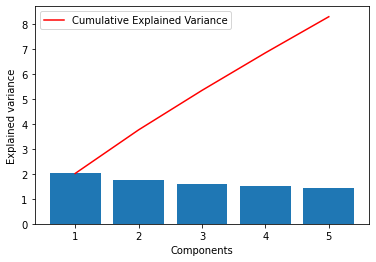

In [39]:
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

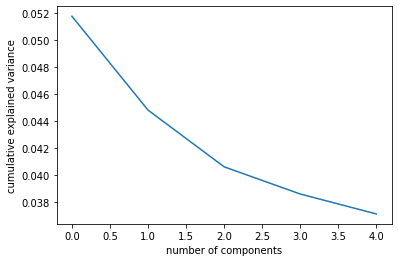

In [40]:
plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#PCA1 is at 0 in xscale

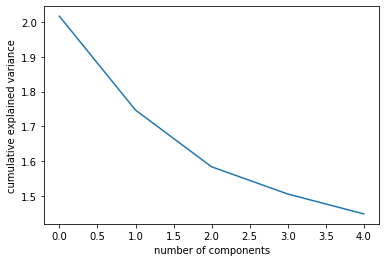

In [41]:
plt.plot(pcamodel.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

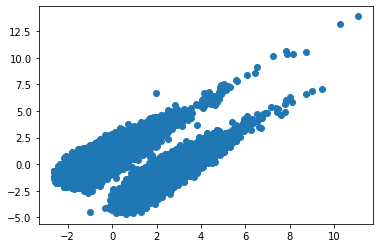

In [42]:
plt.scatter(pca[:, 0], pca[:, 1])

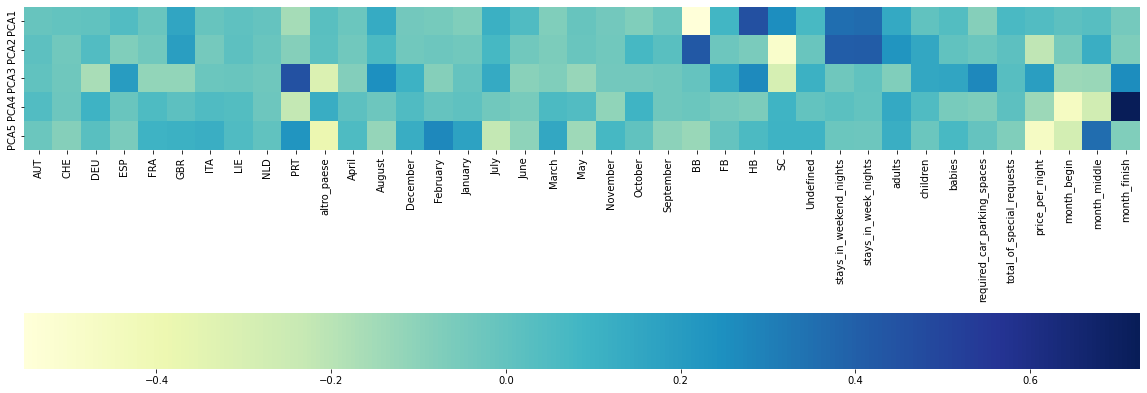

In [43]:
plt.figure(figsize=(20,20))

ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(scaled_df.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

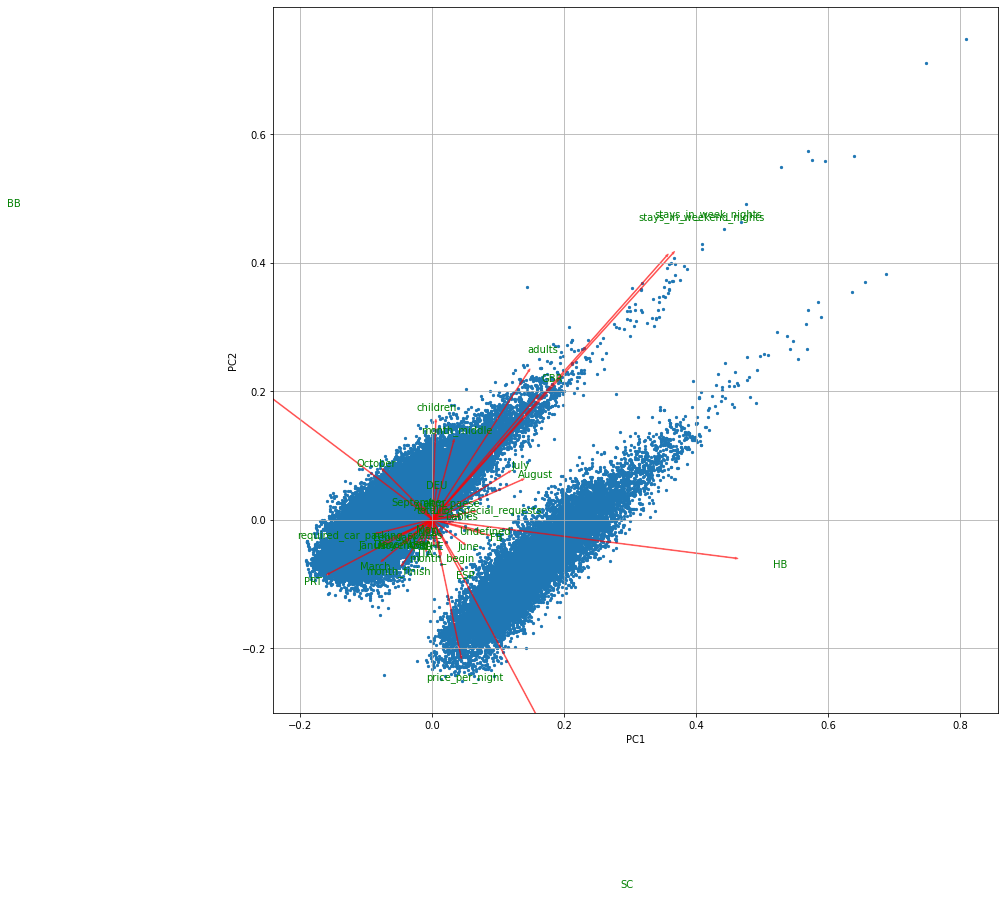

In [44]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(13,13))
myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(scaled_df.columns))
plt.show()

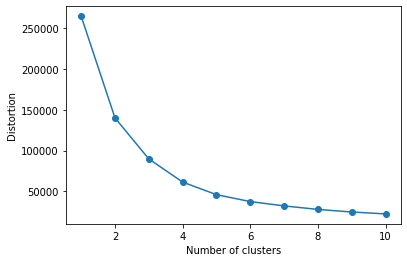

In [45]:
from sklearn.cluster import KMeans

pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(scaled_df)

distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(pca)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

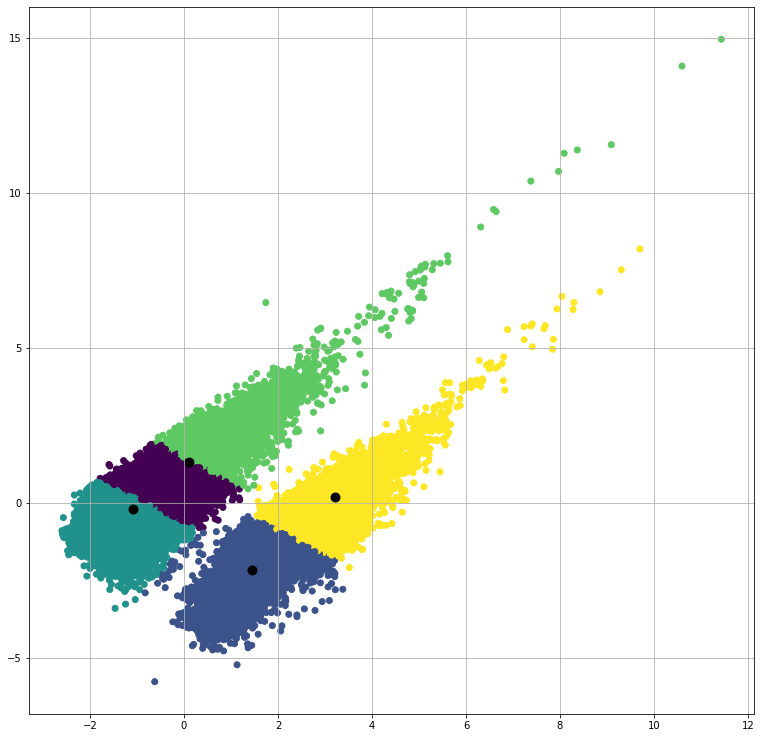

In [46]:
alg = KMeans(n_clusters=4, random_state=None).fit(pca)
centroids = alg.cluster_centers_

p = KMeans(n_clusters=5, random_state=None).fit_predict(pca)

plt.figure(figsize=(13, 13))
plt.scatter(pca[:,0], pca[:,1], c=p)
plt.scatter(centroids[:,0], centroids[:,1], s=80, color='k')

plt.grid()
plt.show()

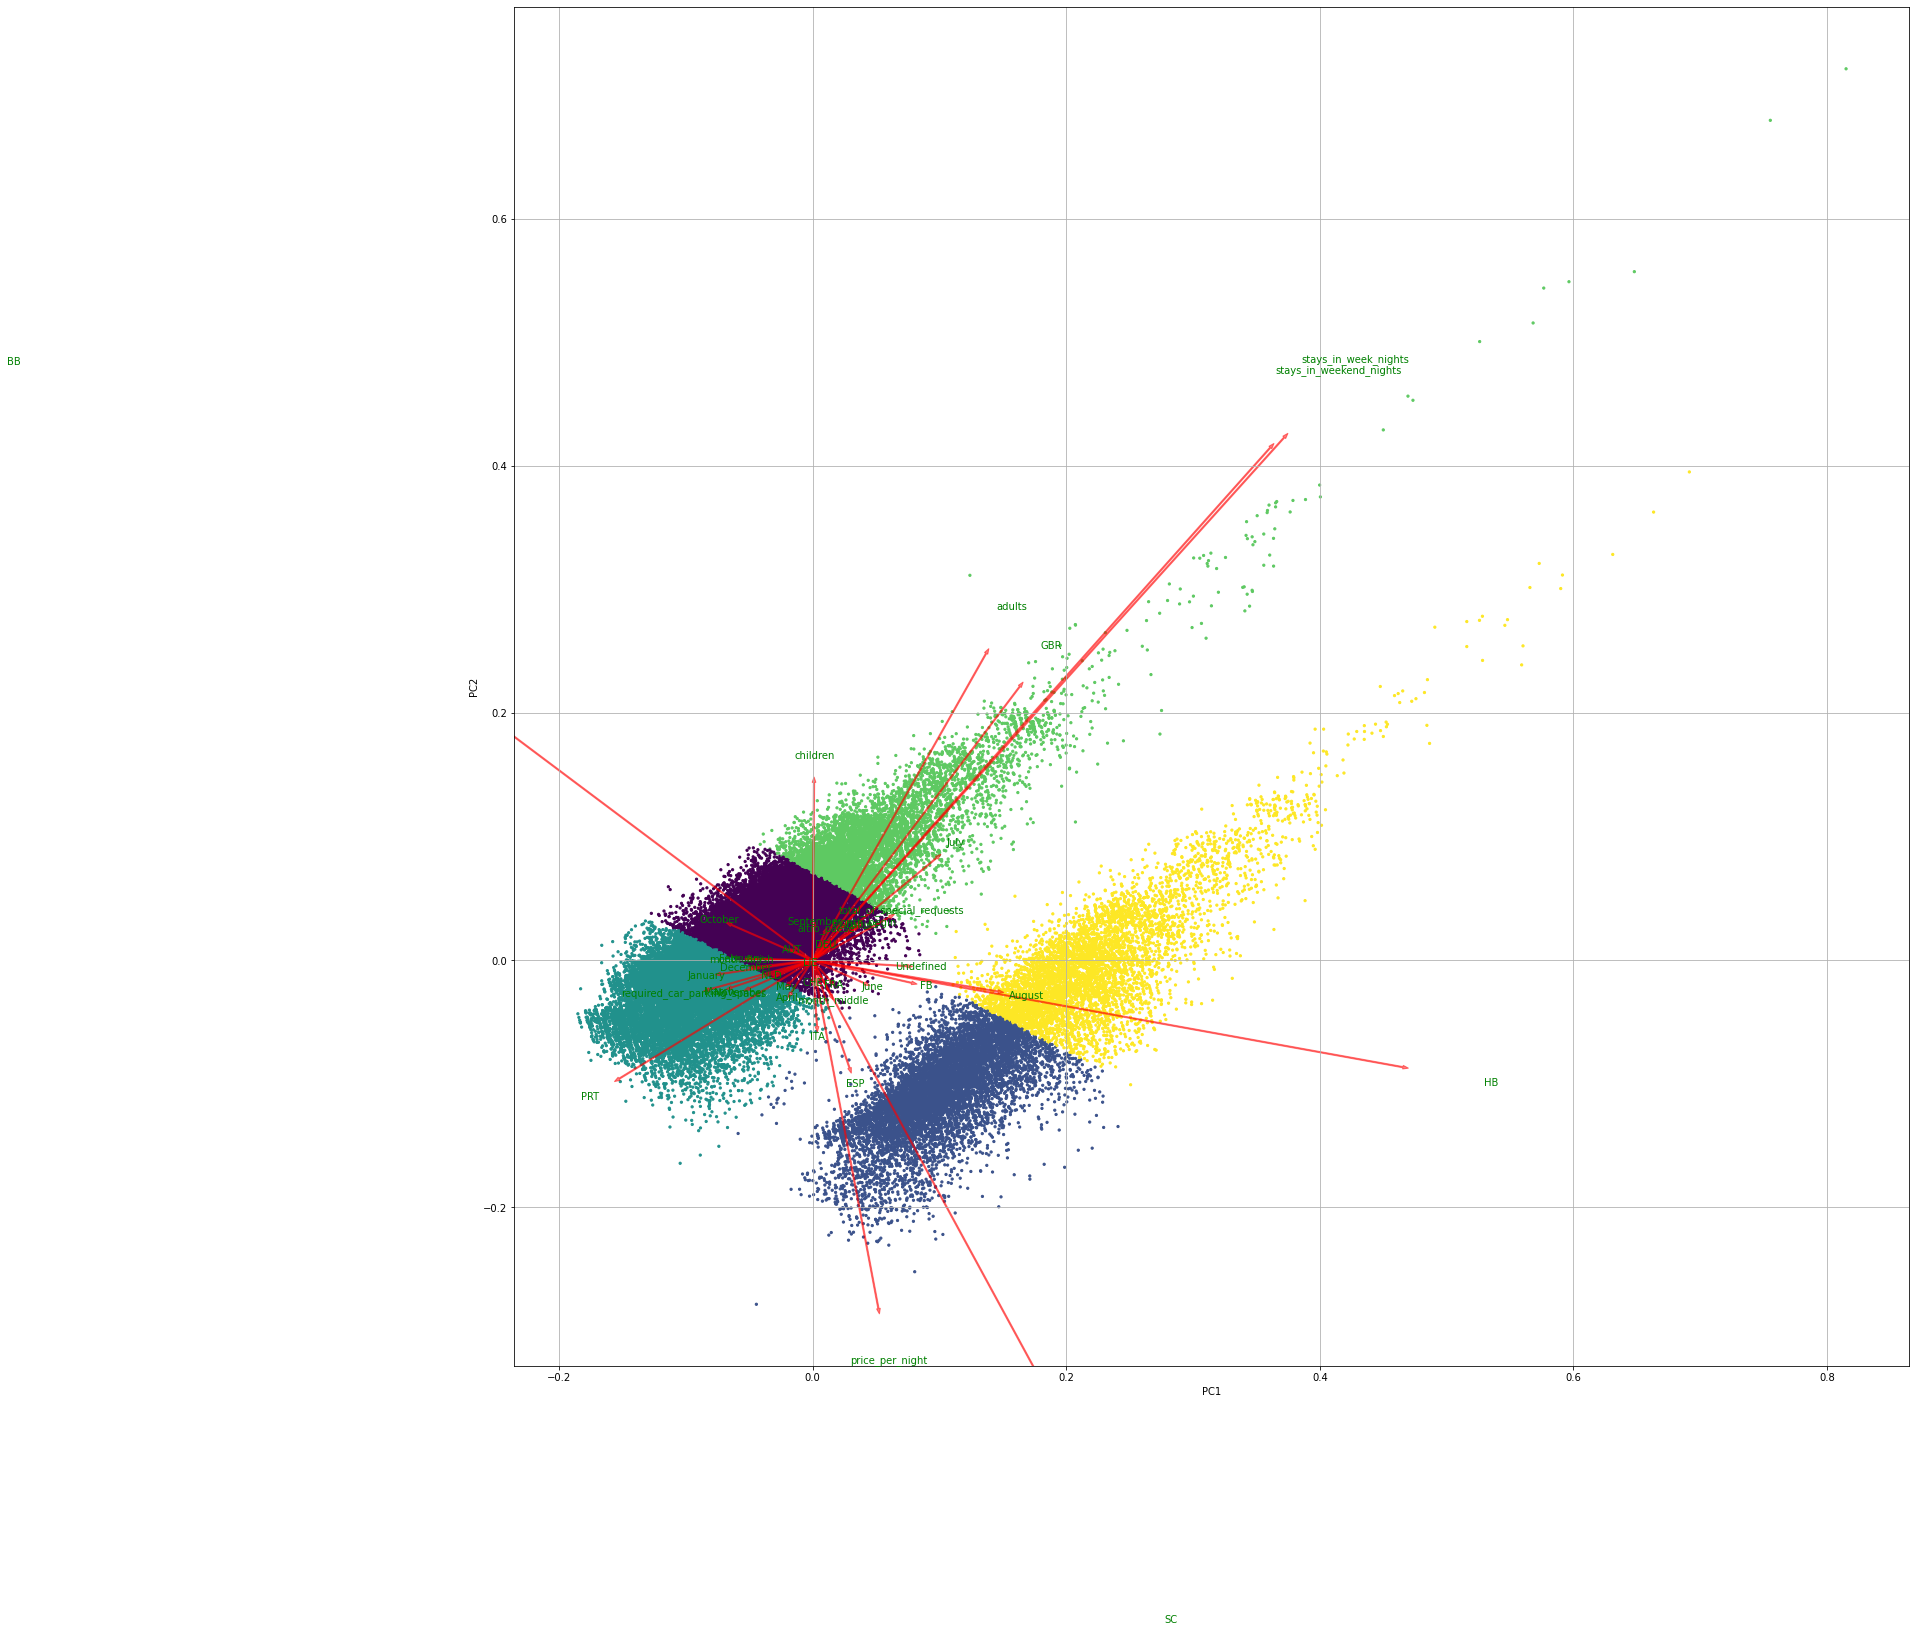

In [47]:
def myplot_clust(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5,c=p)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(25,25))
myplot_clust(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(scaled_df.columns))
plt.show()